# Step 1: Import helpful libraries
reference for this notebook :
Preprocess num data :

-https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

-https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


In [3]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 5.7 MB/s 


In [4]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from scipy import sparse
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,Normalizer,QuantileTransformer,PowerTransformer
from sklearn.impute import SimpleImputer
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
#from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif
from sklearn.svm import SVR
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [5]:
# import lux
# Load the training data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [6]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,147861.000000,147861.000000,147861.000000,147861.000000,147861.000000,147861.000000,147861.000000,147860.000000,147860.000000,147860.000000,147860.000000,147860.000000,147860.000000,147860.000000,147860.000000,147860.000000
mean,123108.044724,0.526615,0.460782,0.490309,0.496579,0.492358,0.510618,0.466803,0.537669,0.499391,0.474844,0.474433,0.472667,0.494410,0.508814,8.242291
std,71133.810158,0.231345,0.214252,0.253387,0.219189,0.240088,0.228055,0.210266,0.217980,0.239969,0.217874,0.256154,0.222056,0.247364,0.222751,0.746414
min,1.000000,-0.118026,-0.069309,-0.056087,0.130676,0.255917,0.000000,-0.224635,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151051,0.140329
25%,61435.000000,0.405608,0.310512,0.300803,0.330494,0.284192,0.354399,0.342855,0.356343,0.333432,0.307025,0.275437,0.307855,0.288818,0.301228,7.743815
50%,123003.000000,0.496093,0.427886,0.502214,0.464912,0.396380,0.488374,0.429317,0.505377,0.439977,0.434495,0.460072,0.433477,0.423134,0.472863,8.190584
75%,184667.000000,0.667789,0.615133,0.647014,0.664061,0.698063,0.669641,0.572624,0.703916,0.606416,0.614309,0.691359,0.641468,0.714107,0.758491,8.727845
max,246470.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032832,1.040229,0.982884,1.055924,1.071444,0.975031,0.905992,10.411992


In [7]:
# Check the structure of the data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147861 entries, 0 to 147860
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      147861 non-null  int64  
 1   cat0    147861 non-null  object 
 2   cat1    147861 non-null  object 
 3   cat2    147861 non-null  object 
 4   cat3    147861 non-null  object 
 5   cat4    147861 non-null  object 
 6   cat5    147861 non-null  object 
 7   cat6    147861 non-null  object 
 8   cat7    147861 non-null  object 
 9   cat8    147861 non-null  object 
 10  cat9    147861 non-null  object 
 11  cont0   147861 non-null  float64
 12  cont1   147861 non-null  float64
 13  cont2   147861 non-null  float64
 14  cont3   147861 non-null  float64
 15  cont4   147861 non-null  float64
 16  cont5   147861 non-null  float64
 17  cont6   147860 non-null  float64
 18  cont7   147860 non-null  float64
 19  cont8   147860 non-null  float64
 20  cont9   147860 non-null  float64
 21  cont10  14

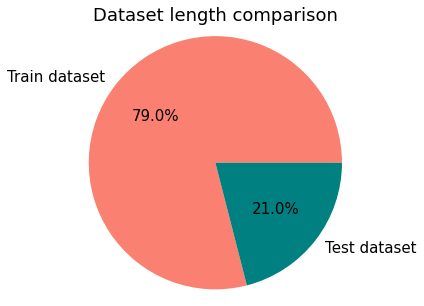

In [8]:
# Comparing the datasets length
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie([len(train), len(test)],
             labels=["Train dataset", "Test dataset"],
             colors=["salmon", "teal"],
             textprops={"fontsize": 15},
             autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize=18)
fig.set_facecolor('white')
plt.show();

# cat/num

In [9]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

# Numerical features distribution 

<Figure size 432x288 with 0 Axes>

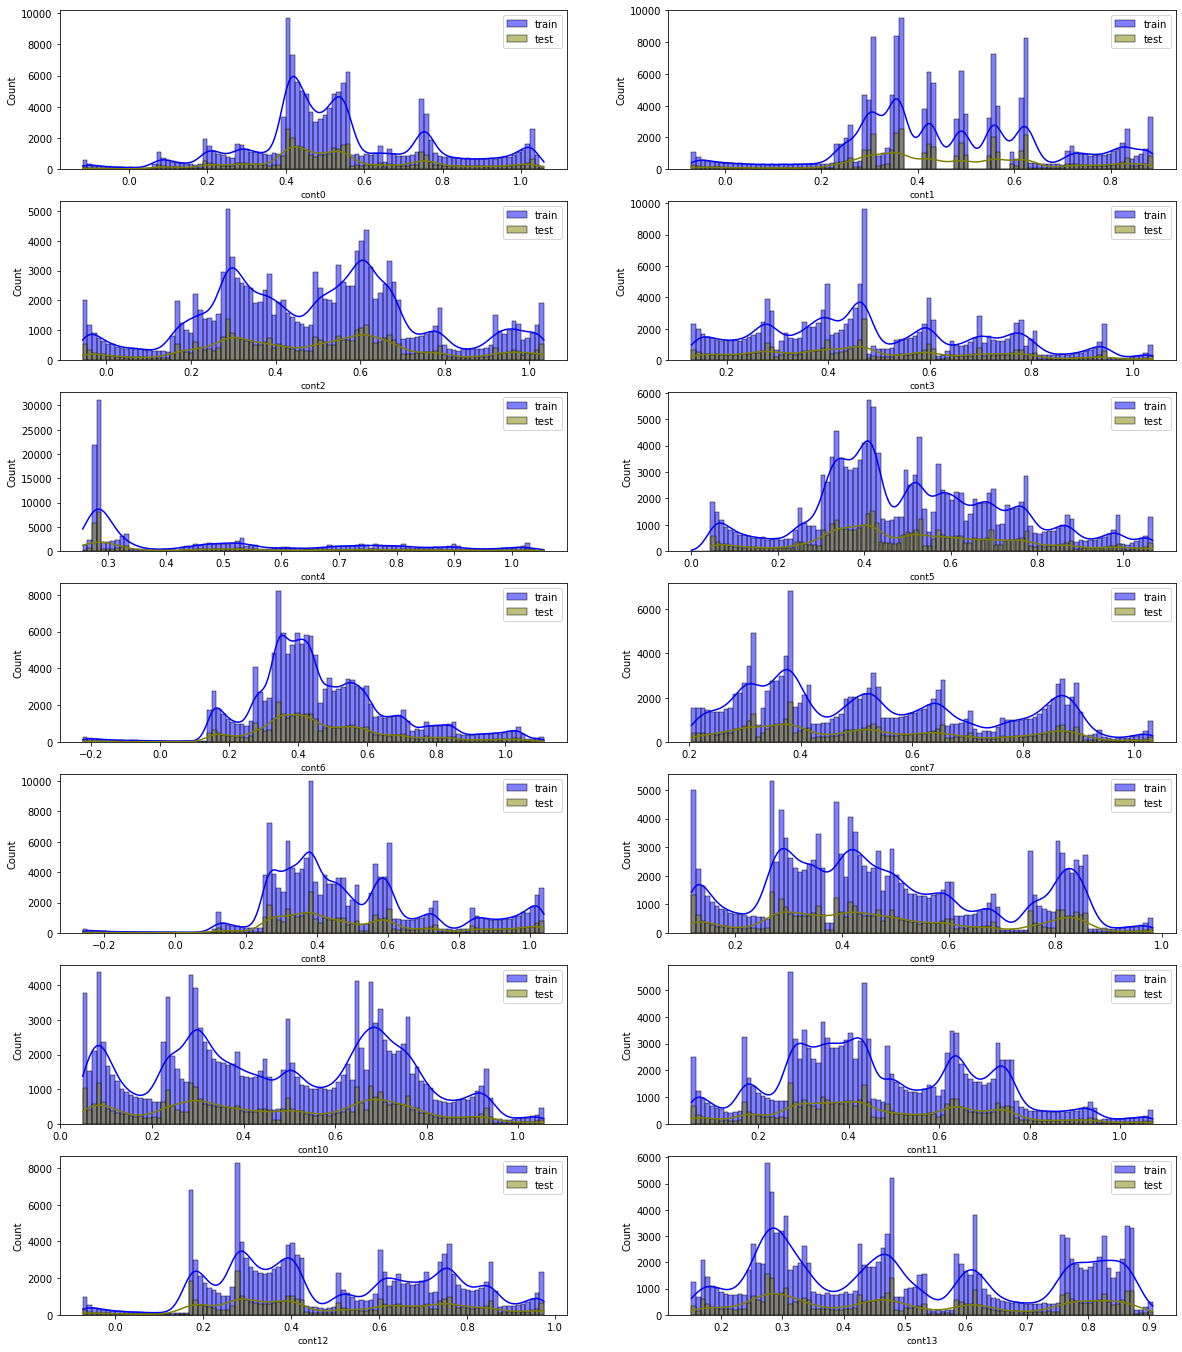

In [10]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(7, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(7, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

# Categorical features distribution 

<Figure size 432x288 with 0 Axes>

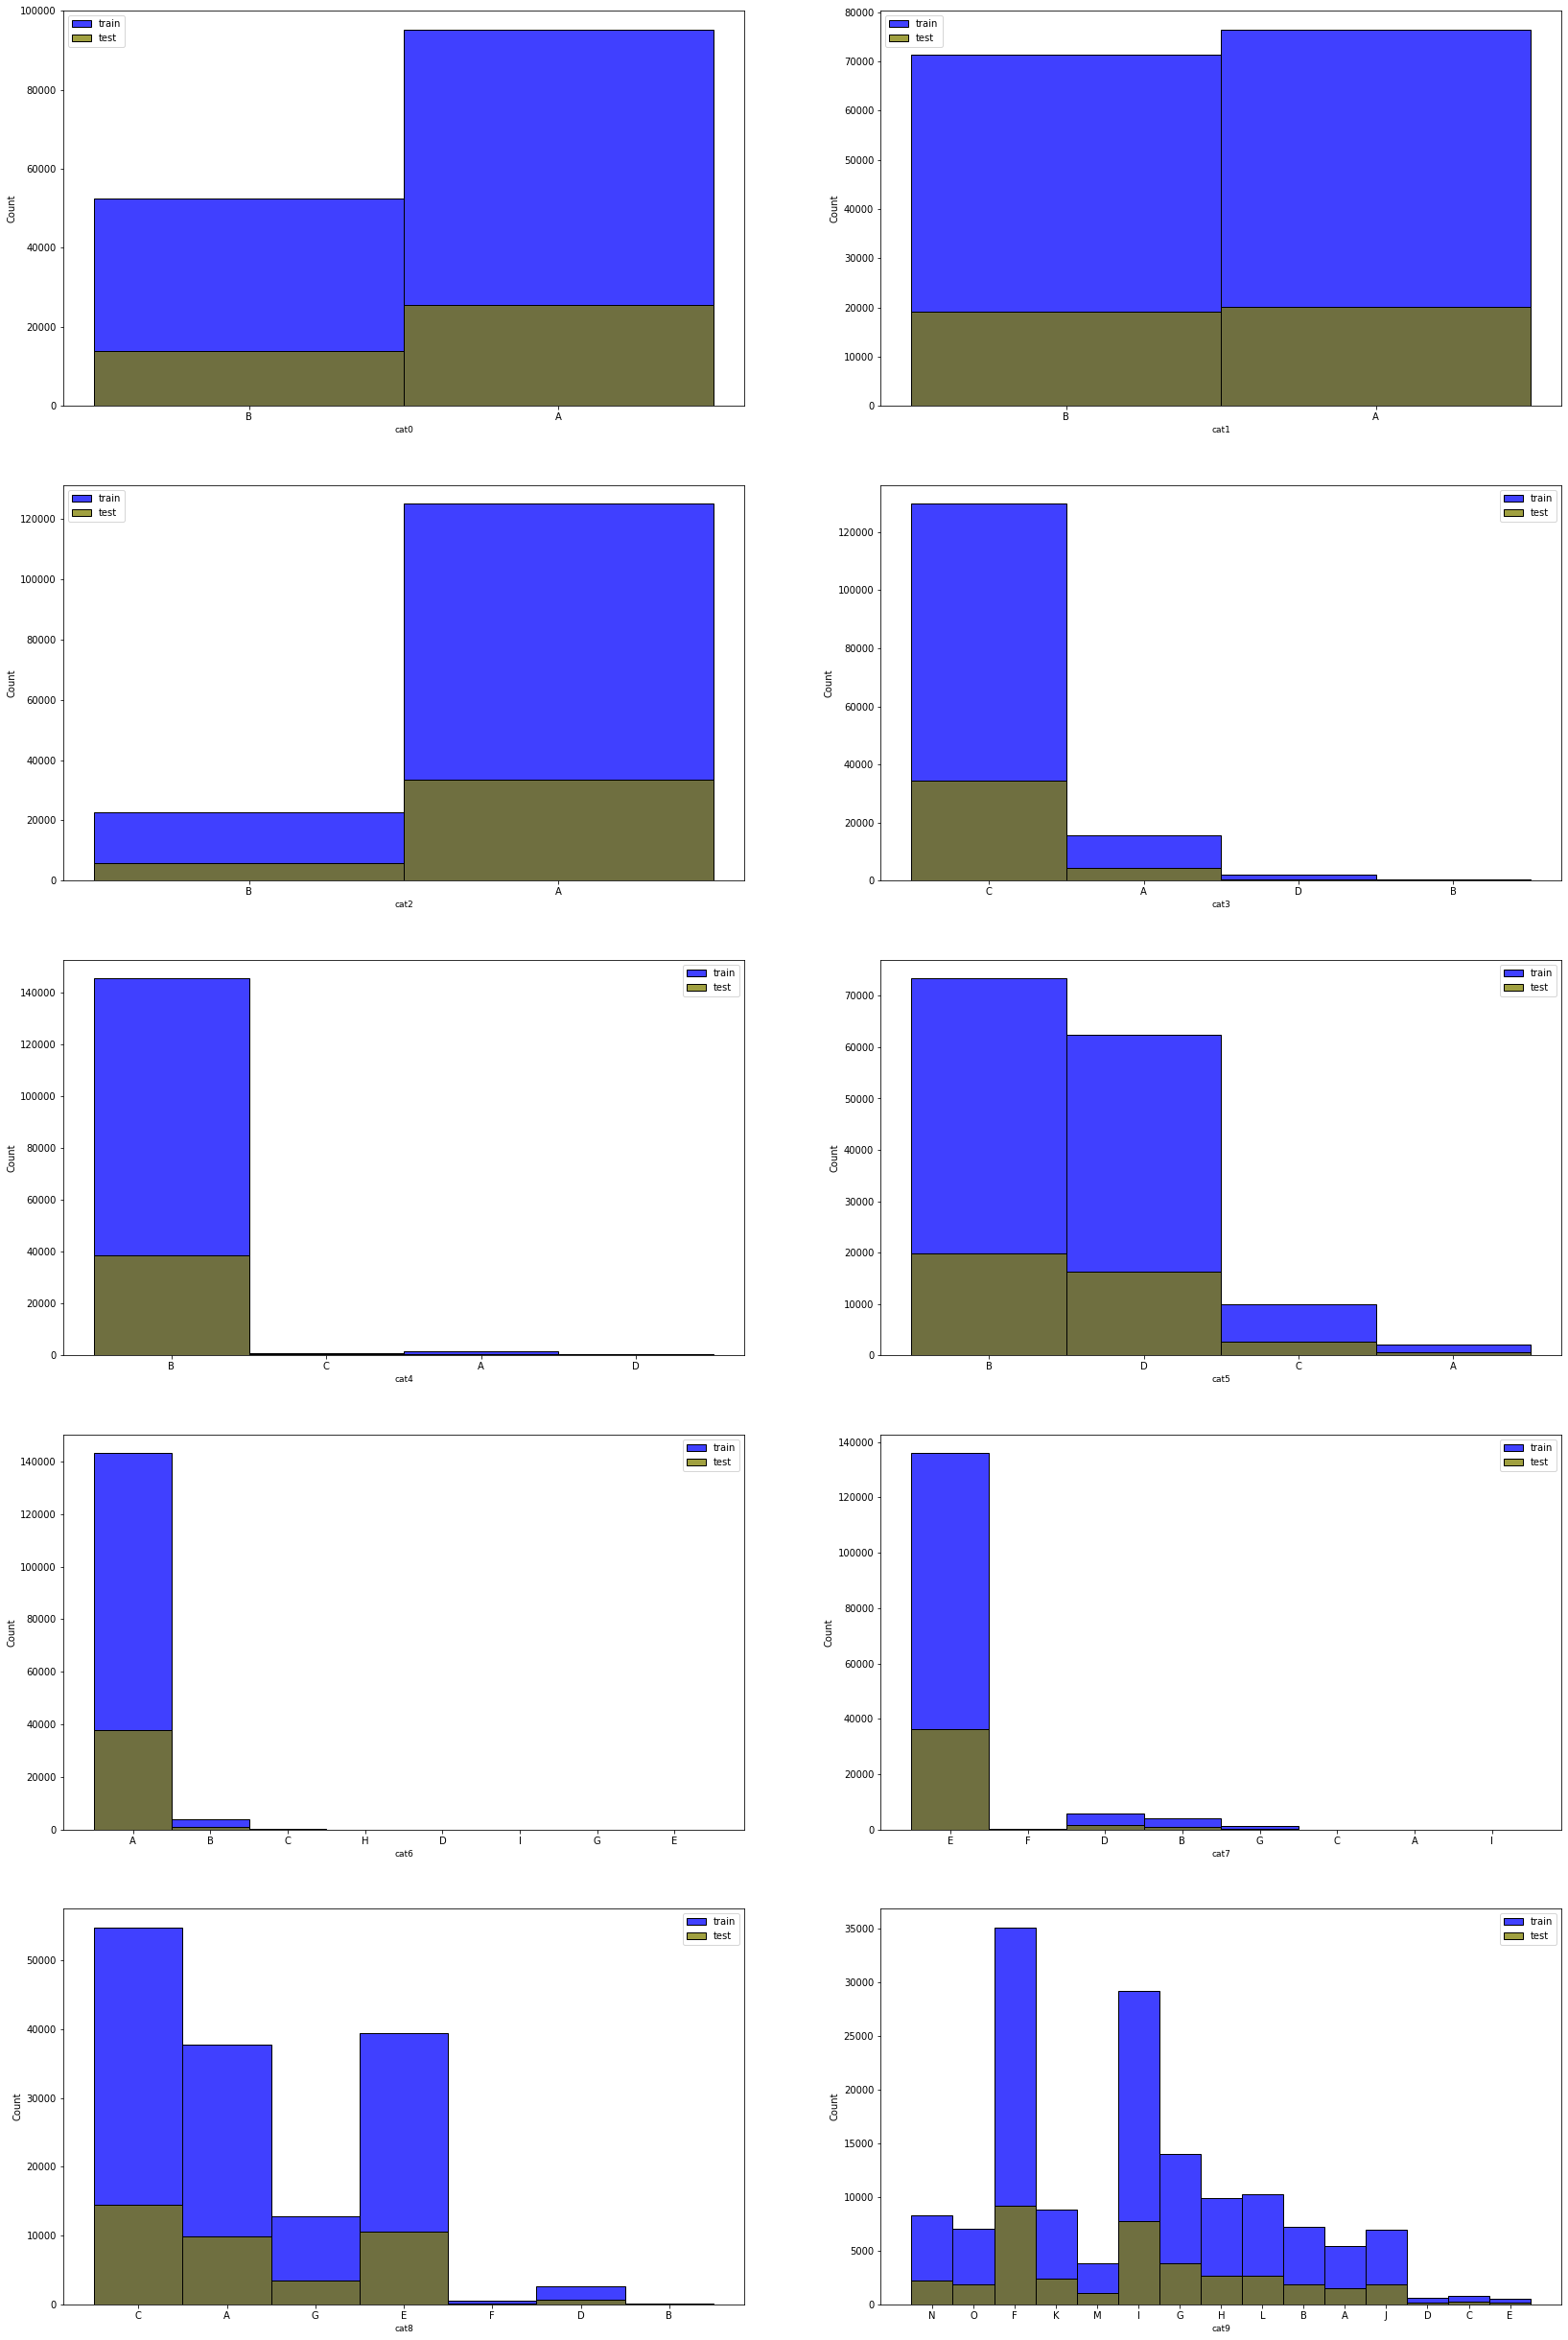

In [11]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(5, 2,figsize=(28, 44))
for feature in cat_columns:
    plt.subplot(5, 2,i)
    sns.histplot(train[feature],color="blue", label='train')
    sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

In [12]:
#Features correlation
corr =  train.drop(['id'], axis=1).select_dtypes(exclude=['int64','float64']).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Convert Dtypes : 

In [13]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147861 entries, 0 to 147860
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      147861 non-null  int64   
 1   cat0    147861 non-null  category
 2   cat1    147861 non-null  category
 3   cat2    147861 non-null  category
 4   cat3    147861 non-null  category
 5   cat4    147861 non-null  category
 6   cat5    147861 non-null  category
 7   cat6    147861 non-null  category
 8   cat7    147861 non-null  category
 9   cat8    147861 non-null  category
 10  cat9    147861 non-null  category
 11  cont0   147861 non-null  float64 
 12  cont1   147861 non-null  float64 
 13  cont2   147861 non-null  float64 
 14  cont3   147861 non-null  float64 
 15  cont4   147861 non-null  float64 
 16  cont5   147861 non-null  float64 
 17  cont6   147860 non-null  float64 
 18  cont7   147860 non-null  float64 
 19  cont8   147860 non-null  float64 
 20  cont9   147860 non-null  f

# Target 

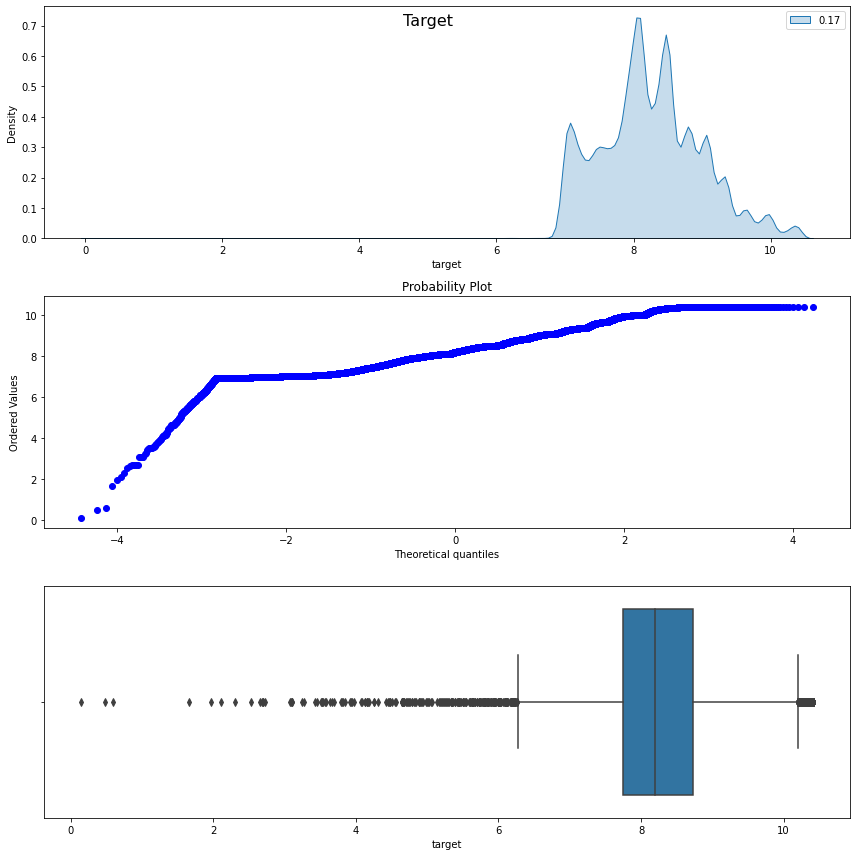

In [15]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);

plt.tight_layout()
plt.show()

# Define the model features and target
## Extract X and y 

In [16]:
# Create arrays for the features and the response variable
y = train['target'].to_numpy()
X = train.drop(['id','target'], axis=1)

# Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [17]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

44359 rows in test set vs. 103502 in training set. 24 Features.


# What should we do for each colmun
## Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
## Cat Features 

In [18]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns


## Num Features 

In [19]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [20]:
print(cat_columns)
print(num_columns)

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9'],
      dtype='object')
Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')


# check that we have all column

In [21]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(all_columns)

['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


In [22]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

Ok


# Create complexe transformer  in order to  put all transformations in the same pipe 
    'num_columns' :Cleaning->Valeur Manquante -> Standar_Scaler
    'cat_columns' : Cleaning -> Valeur Manquante -> Categorique [One Hot]


    fill_missing_then_Standar_scaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
        StandardScaler()
    )

    "Write a pattern to extract numbers and decimals"
    def return_number(string):
        pattern = re.compile(r"\d+\.\d+")
        # Search the text for matches
        number = re.match(pattern, string)
        # If a value is returned, use group(0) to return the found value
        if number is not None:
            return float(number.group(0))

    extraire_number_then_imput_then_scale = make_pipeline(
        FunctionTransformer(extract_number),
        fill_missing_then_Standar_scaler,
    )    


list to drop ['cat0', 'cat2', 'cont1', 'cat4'] +

In [23]:
!nvidia-smi

Mon Aug 23 17:42:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Sparse interation 

In [24]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal) 

# Steps for K-fold cross-validation

    Split the dataset into K equal partitions (or "folds")
        So if k = 5 and dataset has 150 observations
        Each of the 5 folds would have 30 observations
    Use fold 1 as the testing set and the union of the other folds as the training set
        Testing set = 30 observations (fold 1)
        Training set = 120 observations (folds 2-5)
    Calculate testing accuracy
    Repeat steps 2 and 3 K times, using a different fold as the testing set each time
        We will repeat the process 5 times
        2nd iteration
            fold 2 would be the testing set
            union of fold 1, 3, 4, and 5 would be the training set
        3rd iteration
            fold 3 would be the testing set
            union of fold 1, 2, 4, and 5 would be the training set
        And so on...
    Use the average testing accuracy as the estimate of out-of-sample accuracy

Diagram of 5-fold cross-validation

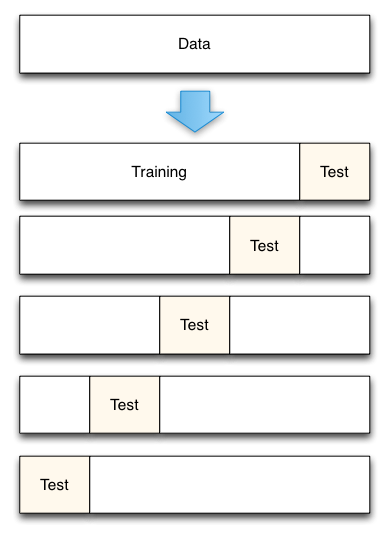






# Comparing cross-validation to train/test split

Advantages of cross-validation:

    More accurate estimate of out-of-sample accuracy
    More "efficient" use of data
        This is because every observation is used for both training and testing

Advantages of train/test split:

    Runs K times faster than K-fold cross-validation
        This is because K-fold cross-validation repeats the train/test split K-times
    Simpler to examine the detailed results of the testing process

# Cross-validation recommendations

    K can be any number, but K=10 is generally recommended
        This has been shown experimentally to produce the best out-of-sample estimate
    For classification problems, stratified sampling is recommended for creating the folds
        Each response class should be represented with equal proportions in each of the K folds
            If dataset has 2 response classes
                Spam/Ham
                20% observation = ham
                Each cross-validation fold should consist of exactly 20% ham
        scikit-learn's cross_val_score function does this by default

# Feature engineering and selection within cross-validation iterations

    Normally, feature engineering and selection occurs before cross-validation
    Instead, perform all feature engineering and selection within each cross-validation iteration
    More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data
      



In [25]:
cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

KFold(n_splits=3, random_state=77, shuffle=True)

In [ ]:
# Random HyperParameters
xgb_params = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    #tree_method='gpu_hist',
                    #gpu_id=0, 
                    #predictor="gpu_predictor"
                   )

# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    #'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    #'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    #'Normalizer': Normalizer,
    'MaxAbsScaler': MaxAbsScaler
}
# SelectBest features 
BestfeaturesPercentile={#'50features': 50,
                        '75features': 75,
                       '100features': 100}
#X1=X[0:10].copy()
#y1=y[0:10].copy()
df_resultsXGBRegressor = pd.DataFrame(columns=['encoder', 'scaler', 'Percentnumoffeatures', 'rmse'])
for num in BestfeaturesPercentile:
    for scaler in Scalers:
        for key in encoders:
            try :

                categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', encoders[key]()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    

                numeric_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', Scalers[scaler]()),#(Numerical Input, Numerical Output)
                        ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )

                preprocessor = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer, num_columns),
                        ('categorical', categorical_transformer, cat_columns)
                    ]
                )

                pipe_XGBRegressor = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', XGBR)
                    ]
                )
                #rmse =cross_val_score(pipe_XGBRegressor, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
                pipe_XGBRegressor.fit(X_train, y_train)
                y_pred = pipe_XGBRegressor.predict(X_test)
                rmse=mean_squared_error(y_test, y_pred,squared=False)
                row = {
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': rmse
                }
                df_resultsXGBRegressor = df_resultsXGBRegressor.append(row, ignore_index=True)
                df_resultsXGBRegressor.to_csv('firstmodelXGBRegressor.csv',index=False)               
                print(row)
            except :
                row={
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': np.nan
                }
                df_resultsXGBRegressor = df_resultsXGBRegressor.append(row, ignore_index=True)

In [1]:
df_resultsXGBRegressor.sort_values(by='rmse').head(50)

NameError: ignored

In [ ]:
from google.colab import files
df_resultsXGBRegressor.to_csv('firstmodelXGBRegressor.csv',index=False) 
files.download('firstmodelXGBRegressor.csv')